In [1]:
%matplotlib inline
import numpy as np
import scqubits as scq

In [2]:
bifluxon = scq.Bifluxon.create()

AttributeError: module 'scqubits' has no attribute 'Bifluxon'

# DUMP

In [2]:
zp_yaml = """# bifluxon
branches:
- ["JJ", 1,2, EJ = 20, CJ = 20]
- ["JJ", 2,3, EJ, CJ]
- ["L", 1,3, 1]
- ["C", 1,0, C0 = 0.02]
- ["C", 3,0, 0.02]
- ["C", 2,0, 0.02]
"""
#how to add external flux + gate charge?

In [3]:
bifluxon = scq.Circuit(zp_yaml, from_file=False)

In [4]:
bifluxon.sym_lagrangian()


<IPython.core.display.Latex object>

In [5]:
bifluxon.sym_lagrangian(vars_type="new")

<IPython.core.display.Latex object>

In [6]:
bifluxon.sym_hamiltonian()

<IPython.core.display.Latex object>

In [7]:
bifluxon.hamiltonian()

<330x330 sparse matrix of type '<class 'numpy.complex128'>'
	with 2778 stored elements in Compressed Sparse Column format>

In [8]:
bifluxon.cutoff_names

['cutoff_n_1', 'cutoff_ext_2']

In [9]:
bifluxon.cutoff_n_1 = 10
bifluxon.cutoff_ext_2 = 10

In [10]:
bifluxon.eigenvals()

array([-18.56468712, -18.5643166 , -17.30095802, -17.30095802,
       -16.07967379, -16.07892188])

In [11]:
bifluxon.potential_symbolic

0.004*θ2**2 - EJ*cos(Φ1 - 1.0*θ1) - EJ*cos(1.0*θ1 - 1.0*θ2)

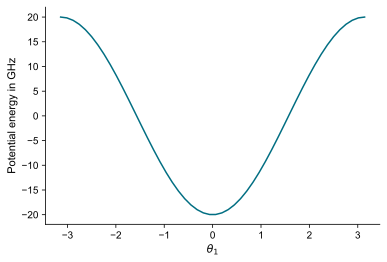

In [12]:
bifluxon.plot_potential(θ1=np.linspace(-np.pi, np.pi),  θ2 = 0);

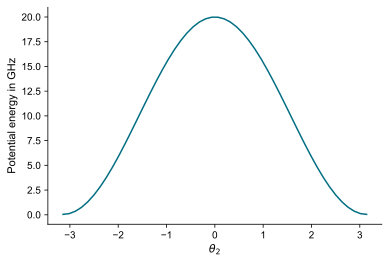

In [13]:
bifluxon.plot_potential(θ1=np.pi,  θ2 = np.linspace(-np.pi, np.pi));

(<Figure size 576x216 with 2 Axes>,
 <AxesSubplot:xlabel='$\\theta_{2}$', ylabel='$\\theta_{1}$'>)

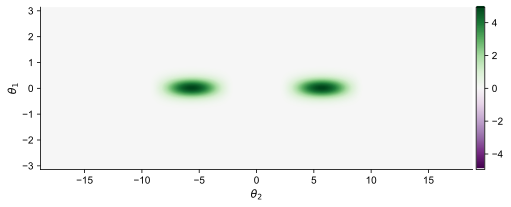

In [14]:
bifluxon.plot_wavefunction(which=0, var_indices=(1,2))

(<Figure size 576x216 with 2 Axes>,
 <AxesSubplot:xlabel='$\\theta_{2}$', ylabel='$\\theta_{1}$'>)

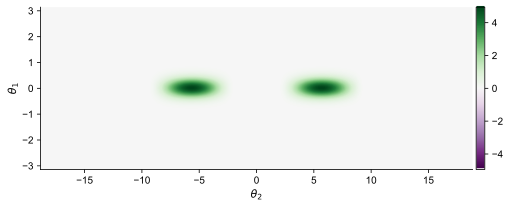

In [15]:
bifluxon.plot_wavefunction(which=1, var_indices=(1,2))

(<Figure size 576x216 with 2 Axes>,
 <AxesSubplot:xlabel='$\\theta_{2}$', ylabel='$\\theta_{1}$'>)

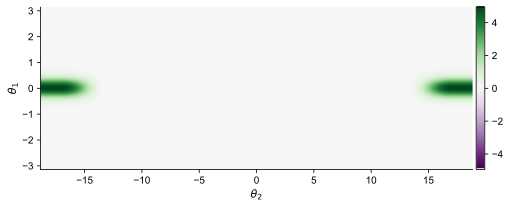

In [16]:
bifluxon.plot_wavefunction(which=2, var_indices=(1,2))

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\theta_{2}$', ylabel='$|\\psi(\\theta_{2})|^2$'>)

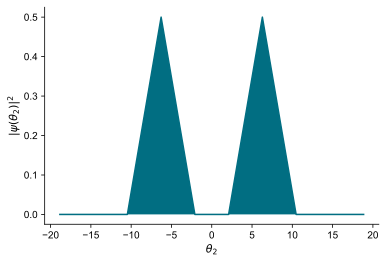

In [17]:
bifluxon.plot_wavefunction(which=0, var_indices=(2,))

Parallel computation of eigensystems [num_cpus=4]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$n_{g1}$', ylabel='energy [GHz]'>)

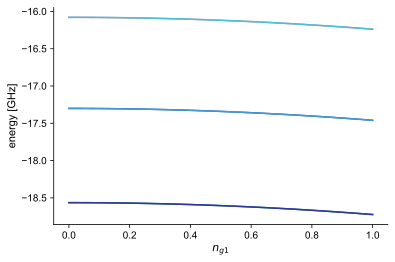

In [19]:
bifluxon.plot_evals_vs_paramvals("ng1", np.linspace(0,1,21), num_cpus=4)

In [ ]:
bifluxon.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21), num_cpus=4)

# Dump: Transmon

In [3]:
transmon = scq.Transmon(
    EJ=30.0,
    EC=1.2,
    ng=0.3,
    ncut=31
)

In [4]:
transmon.eigenvals(evals_count=12)

array([-21.82665096,  -6.1637235 ,   8.0193175 ,  20.04763559,
        30.53712535,  38.70154385,  54.55166998,  67.49080961,
        90.05007774, 107.1126152 , 135.67738991, 156.68121682])

Spectral data:   0%|          | 0/220 [00:00<?, ?it/s]

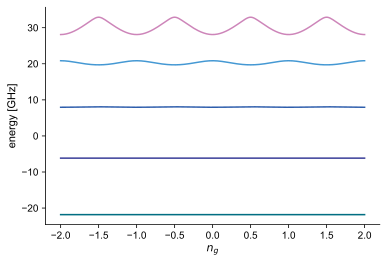

In [5]:
ng_list = np.linspace(-2, 2, 220)
transmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False);

In [6]:
evals, evecs = transmon.eigensys()

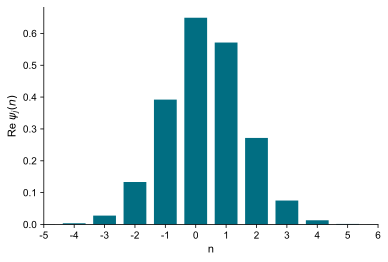

In [7]:
transmon.plot_n_wavefunction(esys=None, which=0, mode='real');

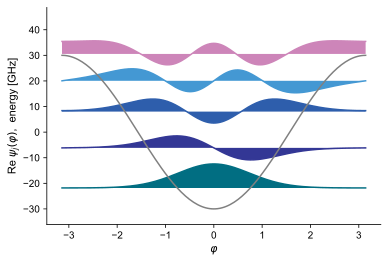

In [8]:
transmon.plot_phi_wavefunction(esys=None, which=[0,1,2,3,4], mode='real');